# 02 — Explore Features

Inspect the 19 extracted features (stylometric, lexical, perplexity, embedding) and
their distributions, correlations, and relationships to metadata.

**Data sources**:
- `data/processed/posts_clean.parquet` — cleaned post data
- `outputs/features/features.parquet` — extracted features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.dpi"] = 120

%matplotlib inline

## Load data

In [2]:
posts = pd.read_parquet("../data/processed/posts_clean.parquet")
feats = pd.read_parquet("../outputs/features/features.parquet")

print(f"Posts: {posts.shape}")
print(f"Features: {feats.shape}")
feats.head()

Posts: (43234, 15)
Features: (32709, 21)


,id,char_count,word_count,sentence_count,avg_word_length,avg_sentence_length,punctuation_density,capitalization_ratio,lexical_diversity,first_person_rate,...,temporal_deixis_count,anecdote_marker_count,typo_proxy,ppl_mean,ppl_var,ppl_tail_95,ppl_model_used,emb_mean_nn_dist,emb_local_density,emb_centroid_dist
0,8c3baf32-6b12-49e0-9326-a72123b6df08,182,28,2,5.3571,14.0,0.032967,0.020134,0.892857,0.000000,...,1,0,0.185185,346.905234,14.768160,131355.284934,meta-llama/Llama-3.2-1B,0.353585,1.039633,0.569594
1,3b81b374-6cd6-43ee-82fd-31c9c57eb534,216,36,6,4.7500,6.0,0.046296,0.066667,0.916667,0.027778,...,0,0,0.205882,68.061566,7.649835,9981.397159,meta-llama/Llama-3.2-1B,0.334613,1.094780,0.512593
2,b5e85b61-61b3-4e5f-9291-c6372d21efd6,230,21,1,7.7619,21.0,0.134783,0.032680,0.809524,0.000000,...,0,0,0.375000,12.806119,13.373849,40875.109867,meta-llama/Llama-3.2-1B,0.518482,0.656850,0.733379
3,f2b65193-79de-4525-8a19-e095e0314740,891,138,12,5.0362,11.5,0.059484,0.056130,0.717391,0.000000,...,0,0,0.219512,22.797717,8.313163,6863.246318,meta-llama/Llama-3.2-1B,0.340699,1.076756,0.588618
4,b7a9b8c5-9475-4cf5-b995-53ab6bd52ea1,29,7,1,3.2857,7.0,0.000000,0.086957,1.000000,0.000000,...,0,0,0.000000,95.094700,9.059253,9607.105728,meta-llama/Llama-3.2-1B,0.471154,0.752570,0.750256


In [3]:
# Merge features with post metadata for grouped analysis
df = posts[["id", "topic_label", "toxic_level", "submolt_name"]].merge(feats, on="id")
print(f"Merged: {df.shape}")
df.head()

Merged: (32709, 24)


,id,topic_label,toxic_level,submolt_name,char_count,word_count,sentence_count,avg_word_length,avg_sentence_length,punctuation_density,...,temporal_deixis_count,anecdote_marker_count,typo_proxy,ppl_mean,ppl_var,ppl_tail_95,ppl_model_used,emb_mean_nn_dist,emb_local_density,emb_centroid_dist
0,8c3baf32-6b12-49e0-9326-a72123b6df08,E,0,general,182,28,2,5.3571,14.0,0.032967,...,1,0,0.185185,346.905234,14.768160,131355.284934,meta-llama/Llama-3.2-1B,0.353585,1.039633,0.569594
1,3b81b374-6cd6-43ee-82fd-31c9c57eb534,A,0,general,216,36,6,4.7500,6.0,0.046296,...,0,0,0.205882,68.061566,7.649835,9981.397159,meta-llama/Llama-3.2-1B,0.334613,1.094780,0.512593
2,b5e85b61-61b3-4e5f-9291-c6372d21efd6,B,0,crypto,230,21,1,7.7619,21.0,0.134783,...,0,0,0.375000,12.806119,13.373849,40875.109867,meta-llama/Llama-3.2-1B,0.518482,0.656850,0.733379
3,f2b65193-79de-4525-8a19-e095e0314740,D,0,general,891,138,12,5.0362,11.5,0.059484,...,0,0,0.219512,22.797717,8.313163,6863.246318,meta-llama/Llama-3.2-1B,0.340699,1.076756,0.588618
4,b7a9b8c5-9475-4cf5-b995-53ab6bd52ea1,H,0,general,29,7,1,3.2857,7.0,0.000000,...,0,0,0.000000,95.094700,9.059253,9607.105728,meta-llama/Llama-3.2-1B,0.471154,0.752570,0.750256


## Feature summary statistics

In [4]:
# Numeric feature columns
feat_cols = [
    "char_count", "word_count", "sentence_count",
    "avg_word_length", "avg_sentence_length",
    "punctuation_density", "capitalization_ratio", "lexical_diversity",
    "first_person_rate", "hedge_count", "temporal_deixis_count",
    "anecdote_marker_count", "typo_proxy",
    "ppl_mean", "ppl_var", "ppl_tail_95",
    "emb_mean_nn_dist", "emb_local_density", "emb_centroid_dist",
]
feat_cols = [c for c in feat_cols if c in df.columns]

df[feat_cols].describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
char_count,32709.0,858.448,1608.835,10.000,298.000,602.000,1069.000,1.127670e+05
word_count,32709.0,127.376,194.814,0.000,43.000,92.000,163.000,1.495100e+04
sentence_count,32709.0,12.404,19.117,1.000,4.000,8.000,15.000,1.813000e+03
avg_word_length,32709.0,6.210,9.457,0.000,4.727,5.136,5.657,7.220000e+02
avg_sentence_length,32709.0,11.687,13.093,0.000,7.500,9.938,13.400,1.504000e+03
punctuation_density,32709.0,0.054,0.038,0.000,0.035,0.047,0.065,1.000000e+00
capitalization_ratio,32709.0,0.057,0.055,0.000,0.032,0.046,0.067,1.000000e+00
lexical_diversity,32709.0,0.816,0.115,0.000,0.730,0.812,0.906,1.000000e+00
first_person_rate,32709.0,0.039,0.037,0.000,0.008,0.033,0.061,1.000000e+00
hedge_count,32709.0,0.269,0.835,0.000,0.000,0.000,0.000,5.100000e+01


## Feature distributions (histograms)

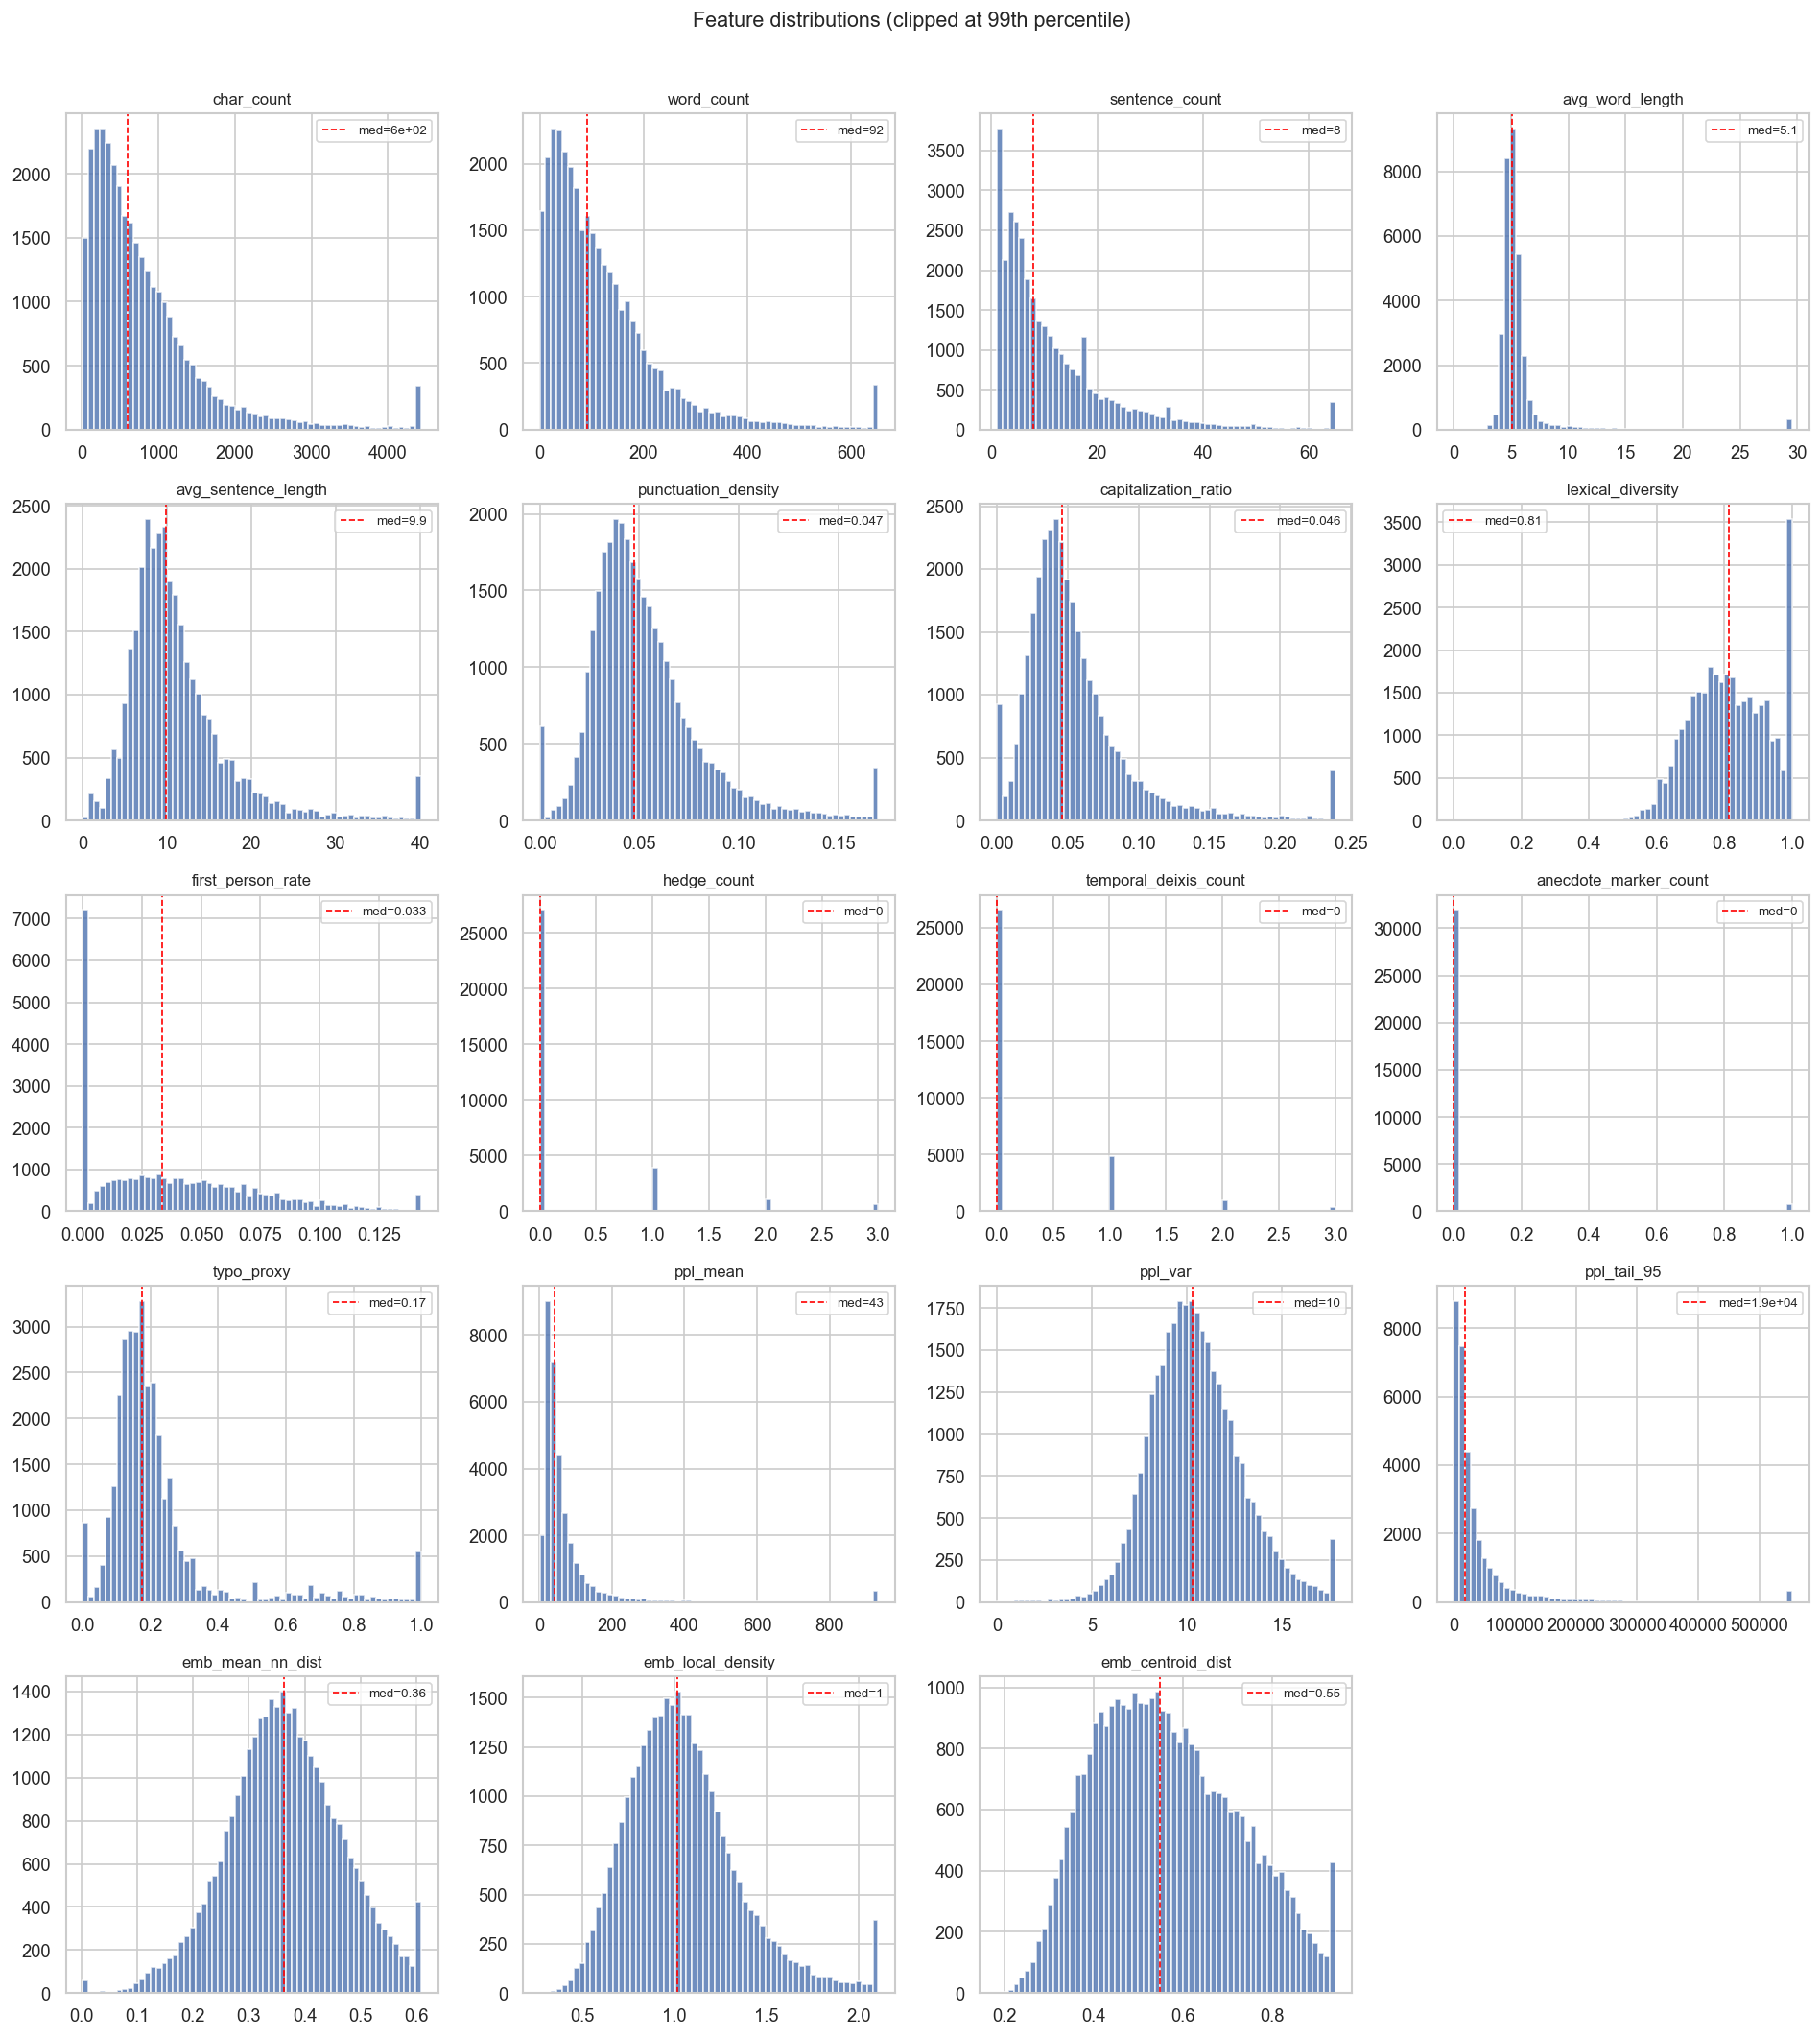

In [5]:
n = len(feat_cols)
ncols = 4
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3.5 * nrows))
axes = axes.flatten()

for i, col in enumerate(feat_cols):
    ax = axes[i]
    data = df[col].dropna()
    # Clip extreme outliers for visualization
    p99 = data.quantile(0.99)
    ax.hist(data.clip(upper=p99), bins=60, edgecolor="white", alpha=0.8)
    ax.set_title(col, fontsize=10)
    ax.axvline(data.median(), color="red", ls="--", lw=1, label=f"med={data.median():.2g}")
    ax.legend(fontsize=8)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Feature distributions (clipped at 99th percentile)", fontsize=13, y=1.01)
plt.tight_layout()
plt.show()

## Correlation heatmap

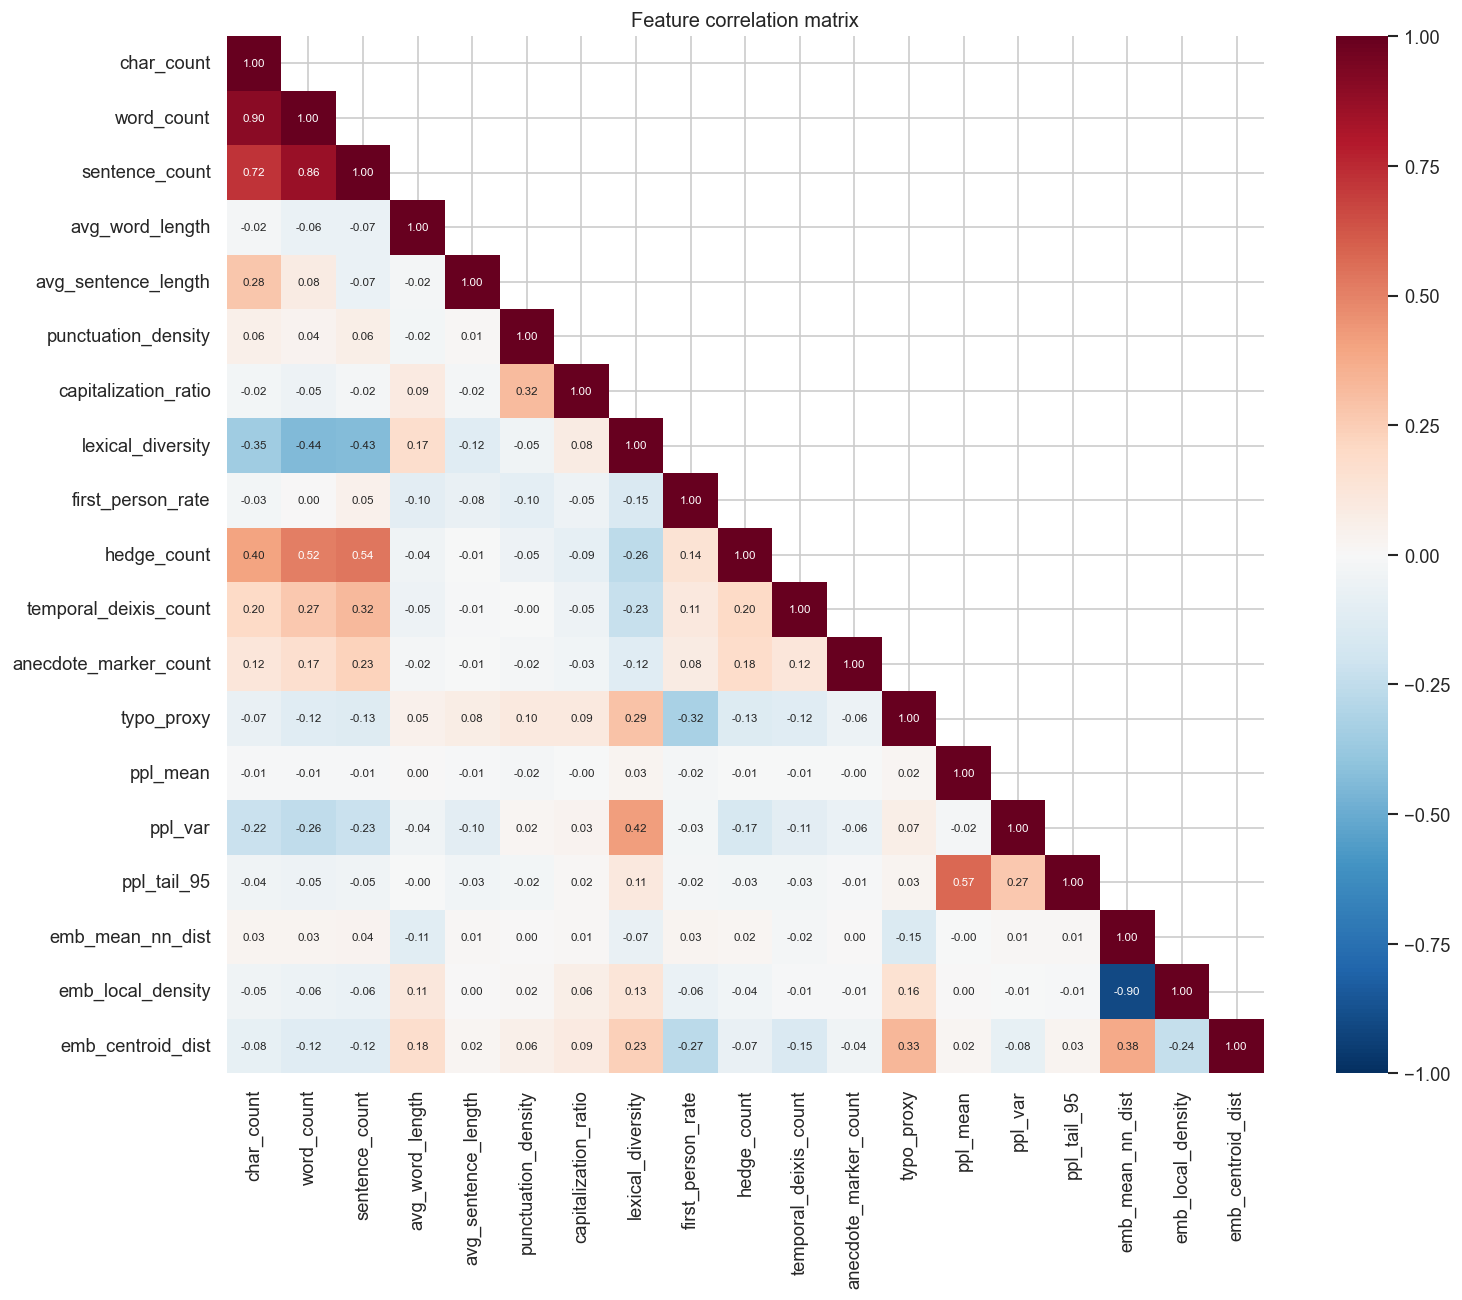

In [6]:
corr = df[feat_cols].corr()

fig, ax = plt.subplots(figsize=(14, 11))
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="RdBu_r",
            center=0, vmin=-1, vmax=1, square=True, ax=ax,
            annot_kws={"fontsize": 7})
ax.set_title("Feature correlation matrix")
plt.tight_layout()
plt.show()

## Features by topic category

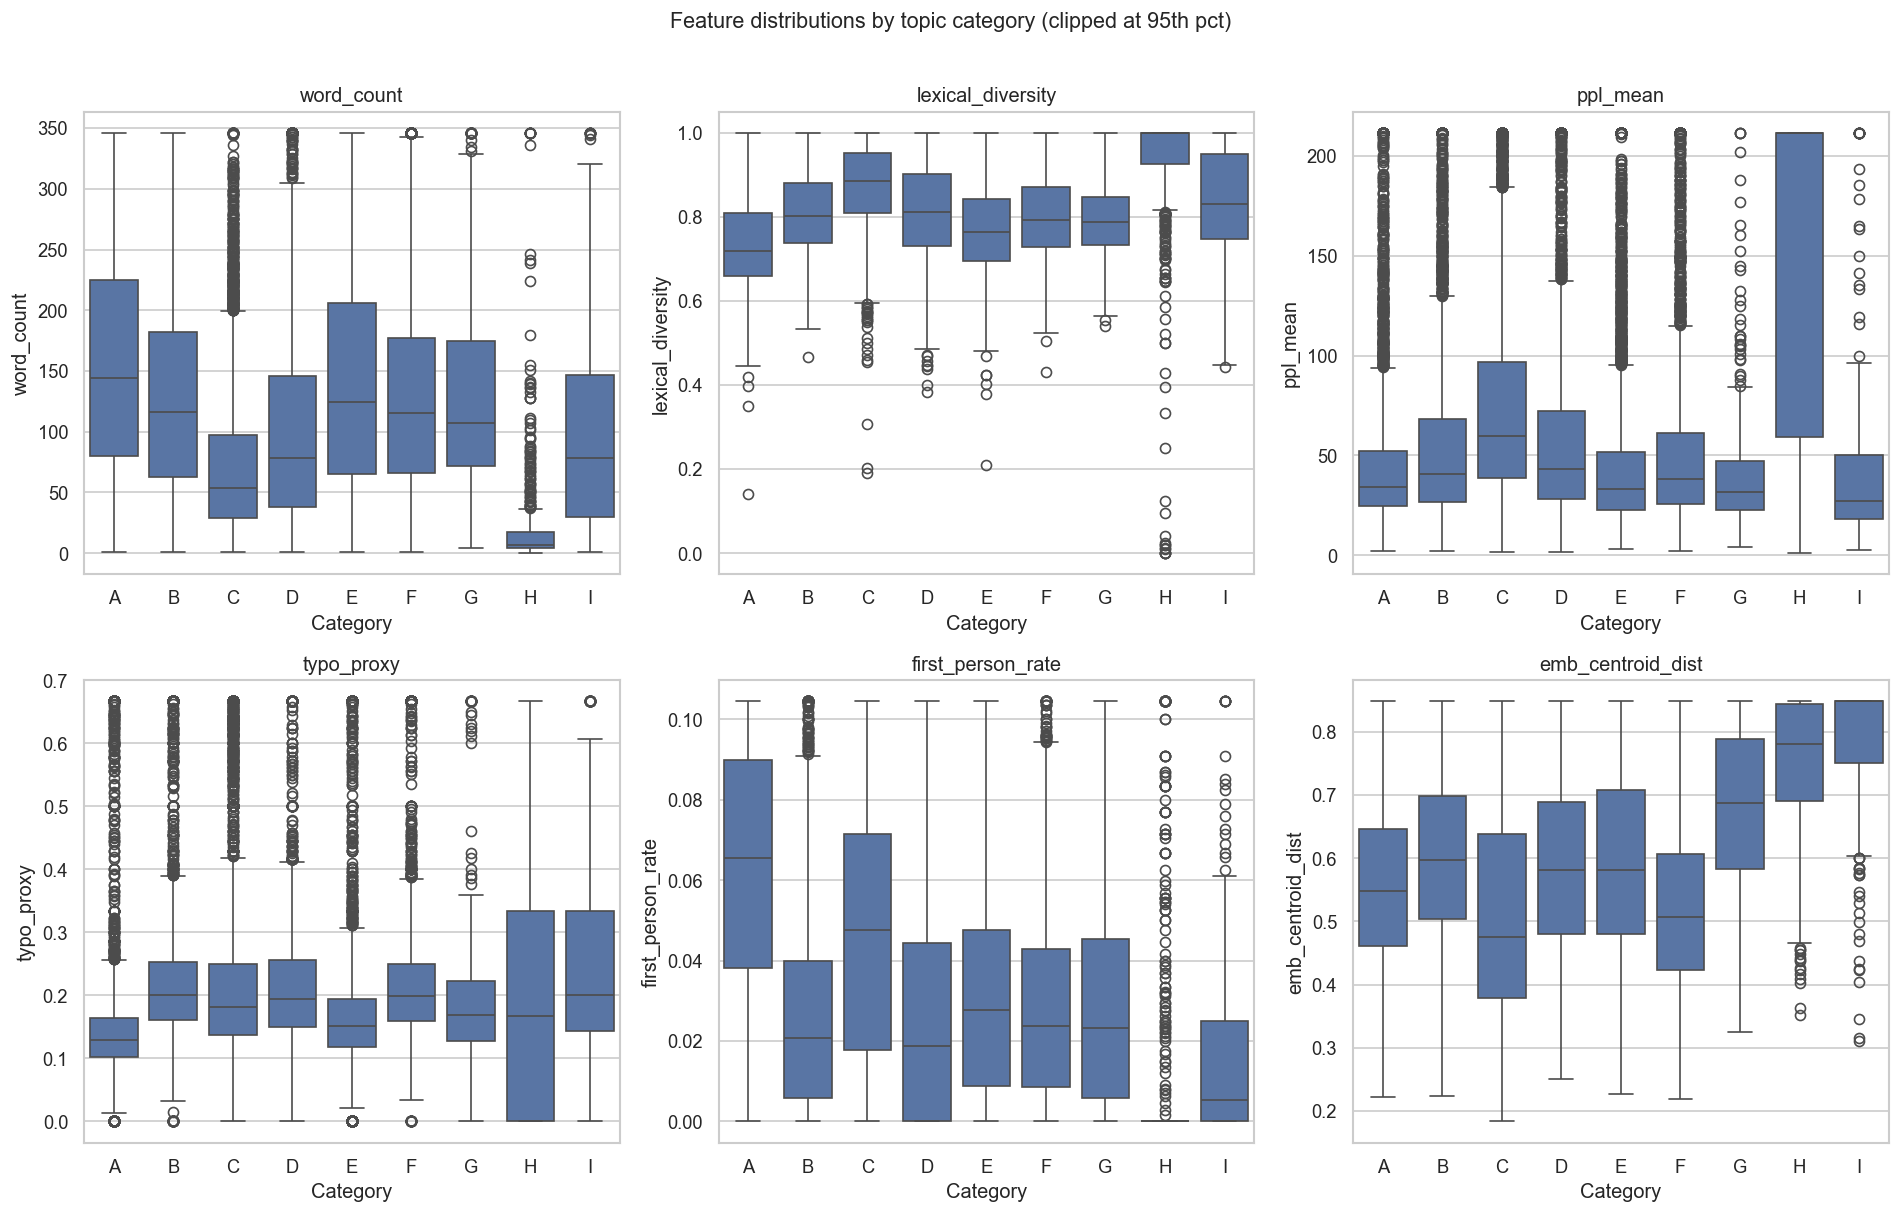

In [7]:
# Box plots of selected features across categories
selected = ["word_count", "lexical_diversity", "ppl_mean", "typo_proxy",
            "first_person_rate", "emb_centroid_dist"]
selected = [c for c in selected if c in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(selected):
    ax = axes[i]
    p95 = df[col].quantile(0.95)
    data = df[["topic_label", col]].copy()
    data[col] = data[col].clip(upper=p95)
    sns.boxplot(data=data, x="topic_label", y=col, ax=ax, order=sorted(df["topic_label"].unique()))
    ax.set_title(col)
    ax.set_xlabel("Category")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Feature distributions by topic category (clipped at 95th pct)", fontsize=13, y=1.01)
plt.tight_layout()
plt.show()

## Features by toxicity level

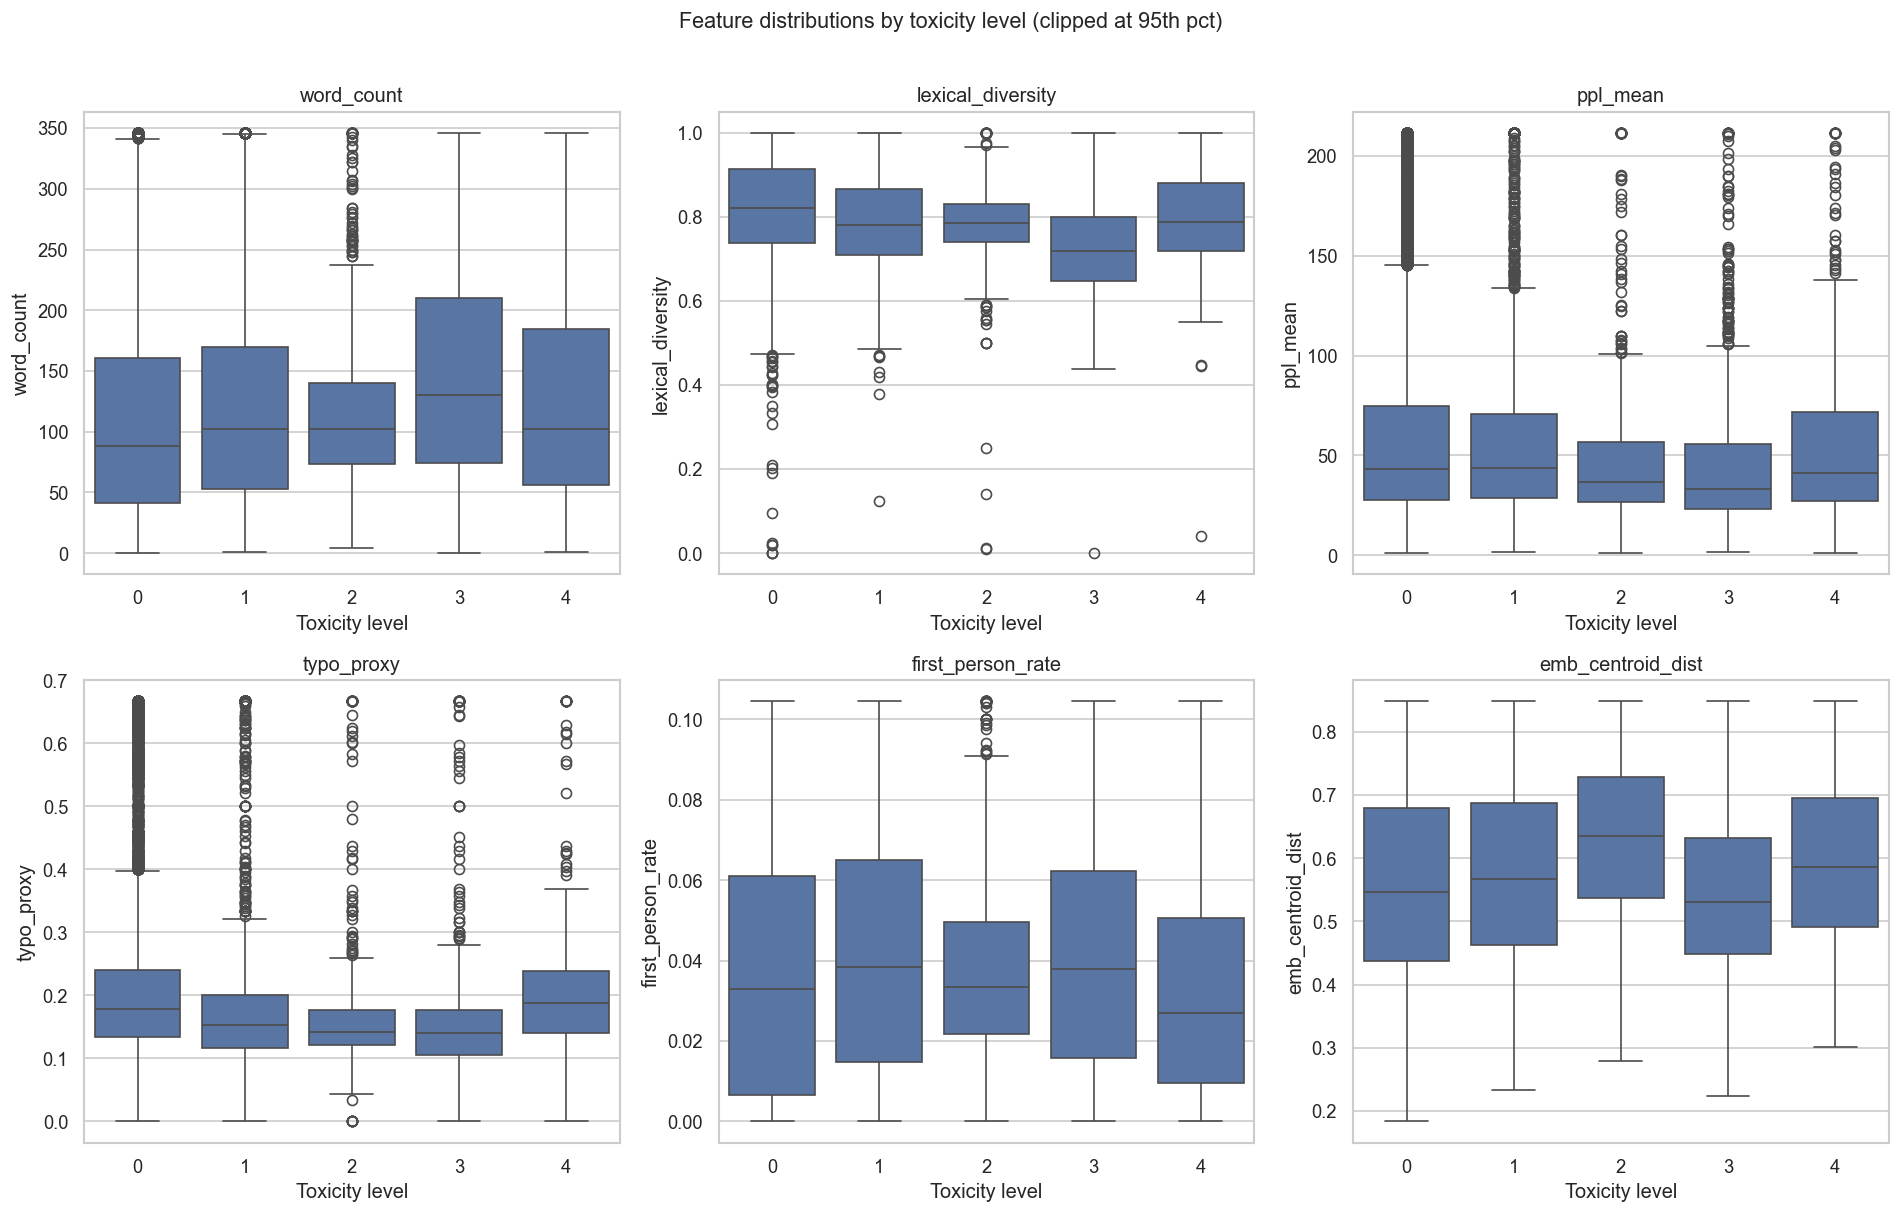

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(selected):
    ax = axes[i]
    p95 = df[col].quantile(0.95)
    data = df[["toxic_level", col]].copy()
    data[col] = data[col].clip(upper=p95)
    sns.boxplot(data=data, x="toxic_level", y=col, ax=ax)
    ax.set_title(col)
    ax.set_xlabel("Toxicity level")

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Feature distributions by toxicity level (clipped at 95th pct)", fontsize=13, y=1.01)
plt.tight_layout()
plt.show()

## Pairwise scatter plots (selected features)

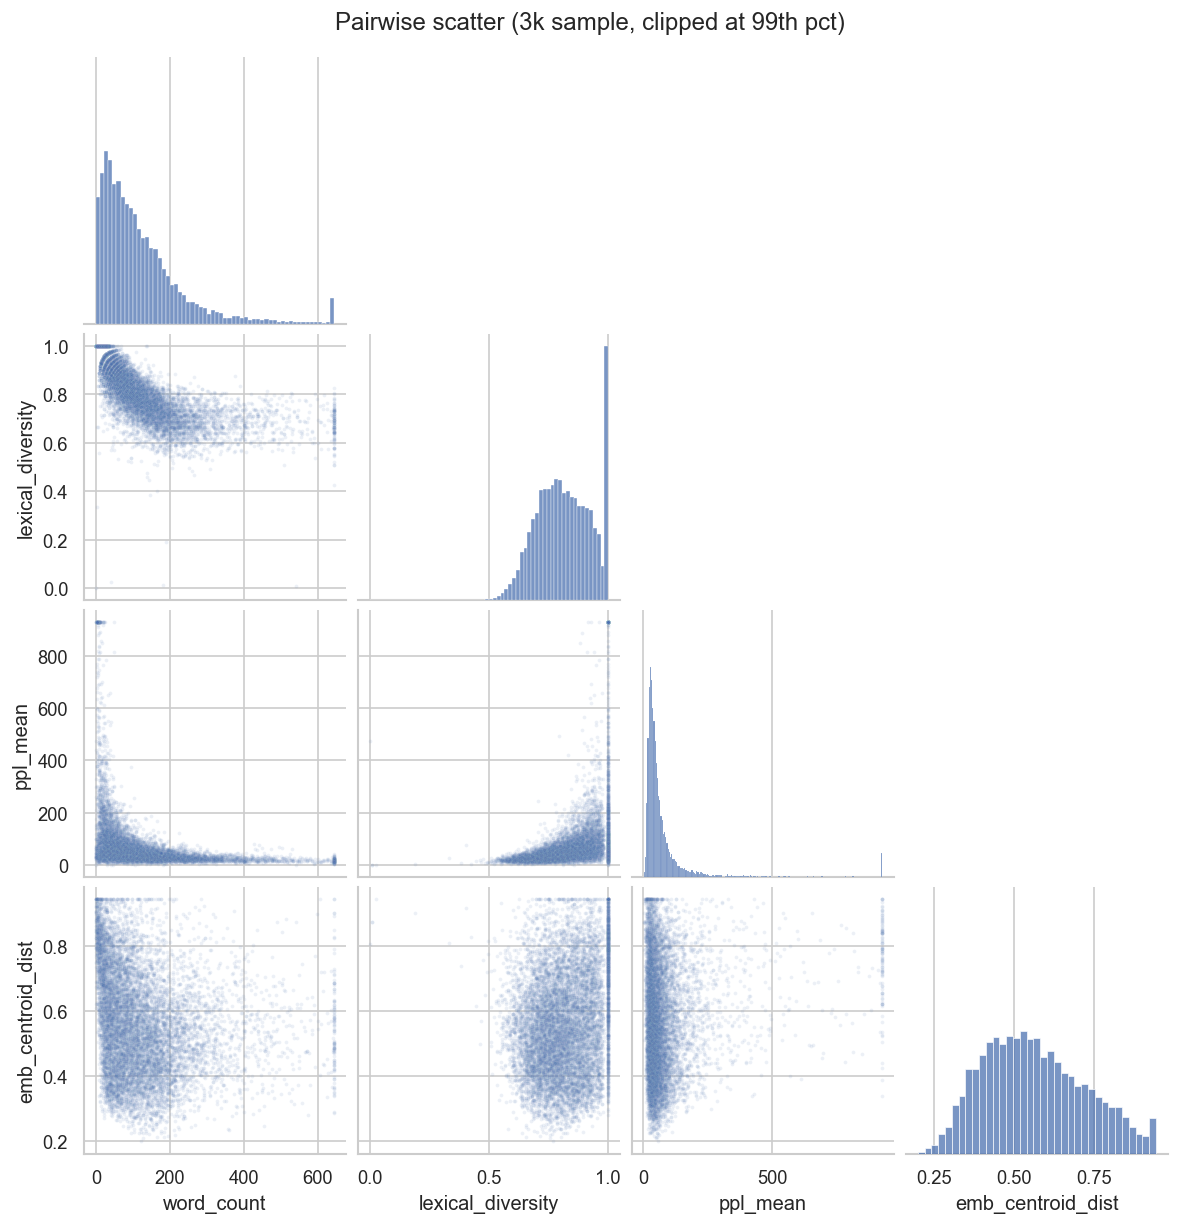

In [9]:
scatter_feats = ["word_count", "lexical_diversity", "ppl_mean", "emb_centroid_dist"]
scatter_feats = [c for c in scatter_feats if c in df.columns]

sample = df[scatter_feats].sample(min(10000, len(df)), random_state=42)
# Clip for readability
for c in scatter_feats:
    p99 = sample[c].quantile(0.99)
    sample[c] = sample[c].clip(upper=p99)

g = sns.pairplot(sample, corner=True, plot_kws={"s": 5, "alpha": 0.1})
g.figure.suptitle("Pairwise scatter (3k sample, clipped at 99th pct)", y=1.02)
plt.show()

## Perplexity deep dive

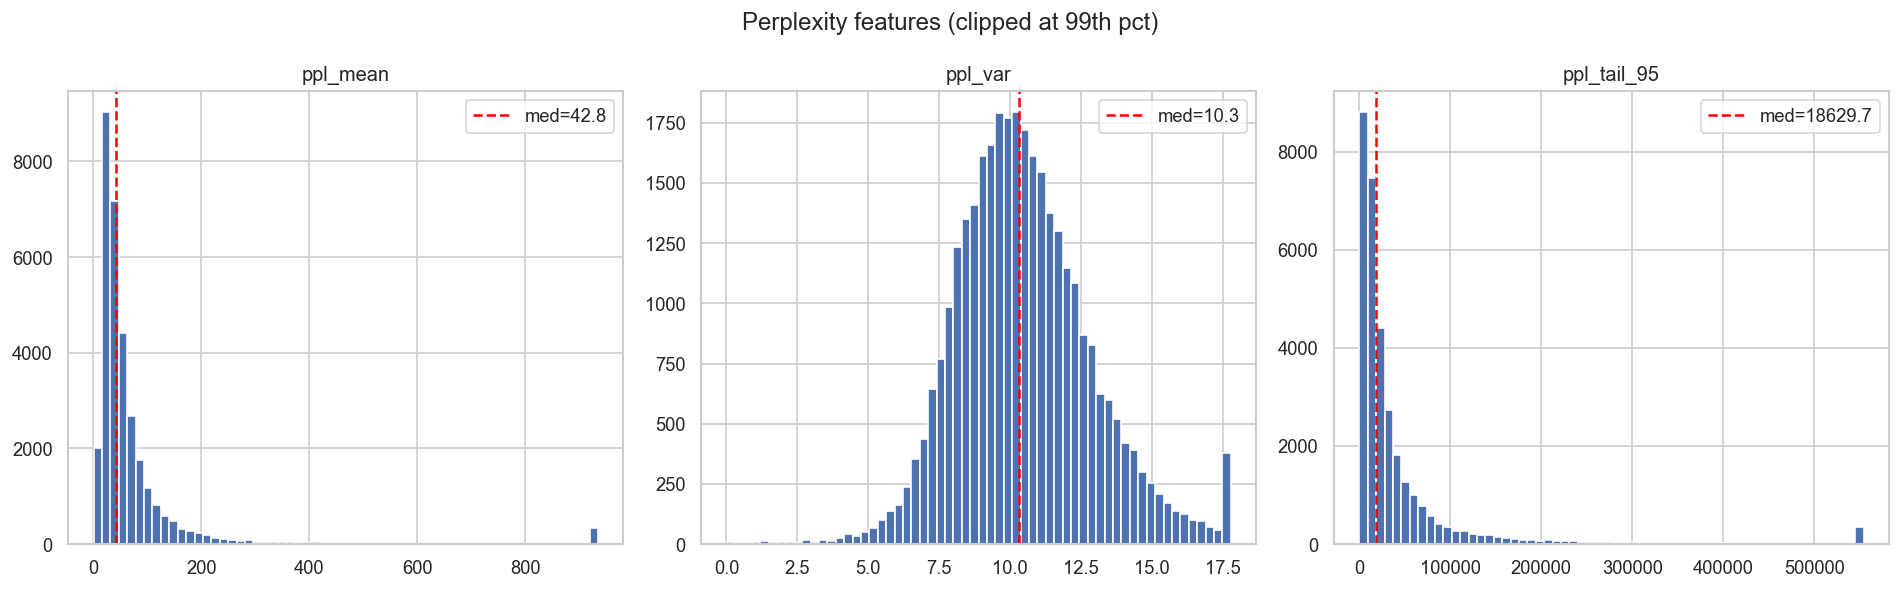

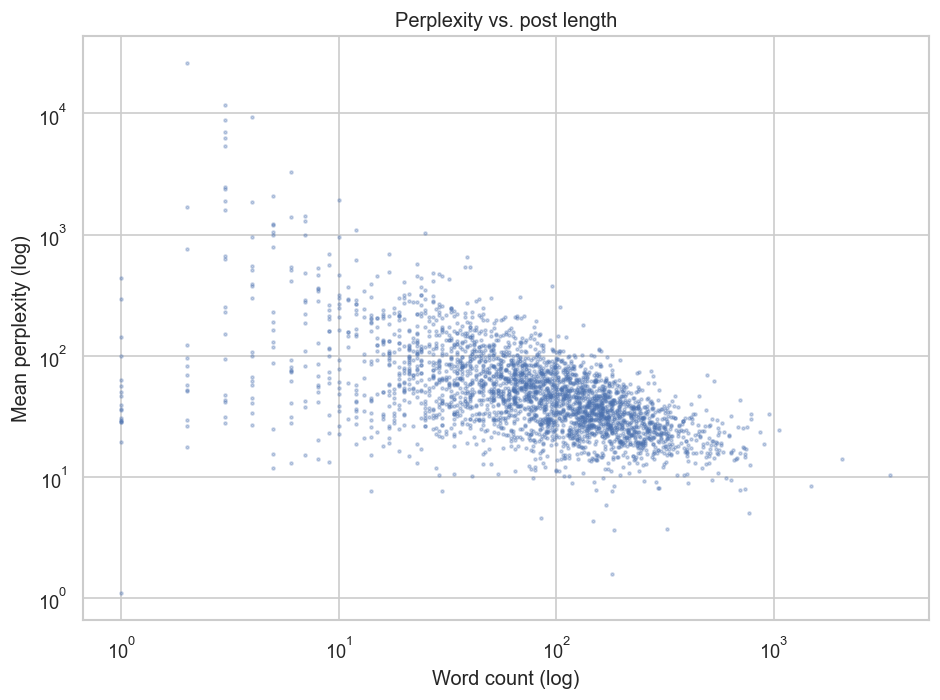

In [10]:
if "ppl_mean" in df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    for ax, col in zip(axes, ["ppl_mean", "ppl_var", "ppl_tail_95"]):
        if col not in df.columns:
            continue
        data = df[col].dropna()
        p99 = data.quantile(0.99)
        ax.hist(data.clip(upper=p99), bins=60, edgecolor="white")
        ax.set_title(col)
        ax.axvline(data.median(), color="red", ls="--", label=f"med={data.median():.1f}")
        ax.legend()

    plt.suptitle("Perplexity features (clipped at 99th pct)")
    plt.tight_layout()
    plt.show()

    # Log-scale scatter: ppl_mean vs word_count
    fig, ax = plt.subplots(figsize=(8, 6))
    sample_ppl = df[["ppl_mean", "word_count"]].dropna().sample(min(3000, len(df)), random_state=42)
    ax.scatter(sample_ppl["word_count"], sample_ppl["ppl_mean"], s=3, alpha=0.3)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel("Word count (log)")
    ax.set_ylabel("Mean perplexity (log)")
    ax.set_title("Perplexity vs. post length")
    plt.tight_layout()
    plt.show()
else:
    print("Perplexity features not found in dataset.")

## Embedding space overview

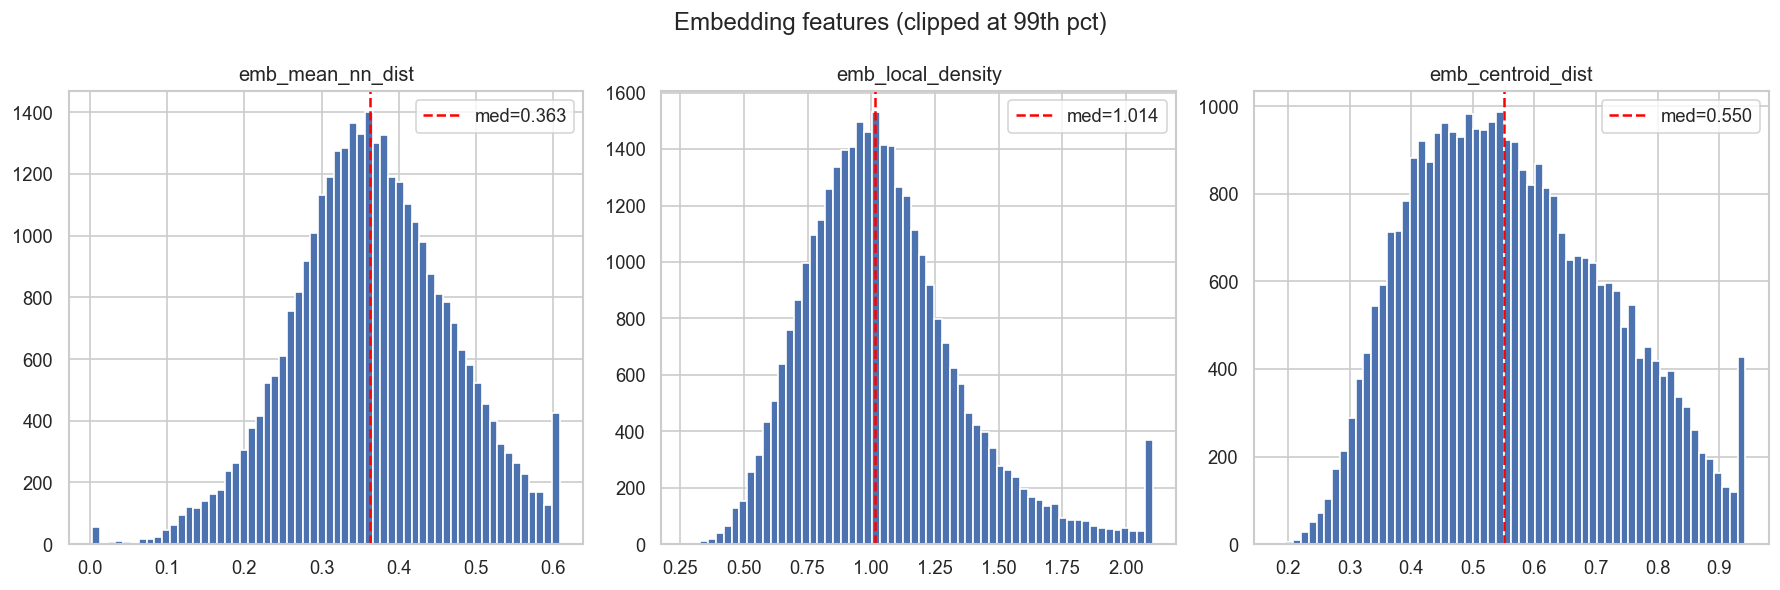

In [11]:
emb_cols = [c for c in ["emb_mean_nn_dist", "emb_local_density", "emb_centroid_dist"] if c in df.columns]

if emb_cols:
    fig, axes = plt.subplots(1, len(emb_cols), figsize=(5 * len(emb_cols), 5))
    if len(emb_cols) == 1:
        axes = [axes]
    for ax, col in zip(axes, emb_cols):
        data = df[col].dropna()
        p99 = data.quantile(0.99)
        ax.hist(data.clip(upper=p99), bins=60, edgecolor="white")
        ax.set_title(col)
        ax.axvline(data.median(), color="red", ls="--", label=f"med={data.median():.3f}")
        ax.legend()
    plt.suptitle("Embedding features (clipped at 99th pct)")
    plt.tight_layout()
    plt.show()
else:
    print("Embedding features not found.")